In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2500)

In [2]:
data = pd.read_csv("Fahrplan", sep = "\t")

In [3]:
#Bei Ausfall wird Row gelöscht, bei Nan Durchschnitt aus vorherigem und nachfolgendem Wert
for column in list(data):
    if ("Delay" in column):
        data = data[data[column] != "fällt aus"]
        data = data[data[column] != "fÃ¤llt aus"]
        data[column] = pd.to_numeric(data[column])
        if ("Hamburger" in column):
            data[column].fillna(data[column].mean(), inplace = True) 
        else:
            data[column].fillna(data[list(data)[(list(data).index(column)) - 2]], inplace = True)   

DelayHamburgerTreppe: 0.8737233054781801
DelayHansastrasse: 0.7316620241411328
DelayStralsunderstrasse: 0.6160631383472609
DelayGreifswalderstrasse: 0.5348189415041783
DelayRostockerstrasse: 0.5436397400185701
DelayBremerstrasse: 0.5459610027855153
DelayBethesdaKrankenhaus: 0.5408542246982359
DelayFriedhofskirche: 0.702414113277623
DelayMarienstrasse: 0.7149489322191273
DelayHoechsten: 0.6973073351903436
DelayKarlsplatz: 0.6527390900649953
DelayMorianstrasse: 0.6685236768802229
DelayHauptbahnhof: 0.8765088207985144
DelayHaubahn: 0.42804085422469823
DelayWolkenburg: 0.20334261838440112
DelayBendahlerstrasse: 0.21262766945218198
DelayHesselnberg: 0.2381615598885794
DelayChristbusch: 0.30362116991643456
DelayFriedhofUnterbarmen: 0.34726090993500464
DelayMeckelstrasse: 0.6044568245125348
DelayImSpringen: 0.658774373259053
DelayZeughausstrasse: 0.6657381615598886
DelayBarmenBahnhof: 0.7748375116063139
DelayAlterMarkt: 0.8495821727019499
DelayLandwehrplatz: 0.7748375116063139
DelayLeimbach: 

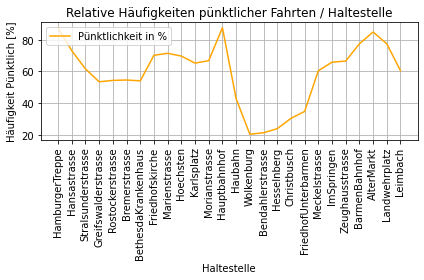

In [4]:
RelativePunktlichkeit = []
Haltestelle = []
for column in list(data):
    if ("Delay" in column):
        print(column + ": " + str((data[column].value_counts(1)).to_dict()[0]))
        RelativePunktlichkeit.append((data[column].value_counts(1)).to_dict()[0] * (100))
        Haltestelle.append(column.replace("Delay", ""))
plt.plot(Haltestelle, RelativePunktlichkeit, color = "orange", label = "Pünktlichkeit in %")
plt.xticks(rotation = "vertical")
plt.grid()
plt.legend(loc = "upper left")
plt.xlabel("Haltestelle")
plt.ylabel("Häufigkeit Pünktlich [%]")
plt.title("Relative Häufigkeiten pünktlicher Fahrten / Haltestelle")
plt.tight_layout()
# plt.savefig("Relative Häufigkeiten pünktlicher Fahrten", dpi = 200)